In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression ,LogisticRegression, Ridge,Lasso


In [2]:
df=pd.read_csv(r"https://drive.google.com/uc?export=download&id=1Glcioa6hHS9_82ogbKshM3pu9_c9hLzB")
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.1583,735501.8070,67432.51700,21250.21377
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733070,554279.8501,733236.8844,65049.90857,20880.60040
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757


In [23]:
x=df.drop(df[['Median_House_Value']],axis=1)
y=df[['Median_House_Value']]


In [24]:
s=StandardScaler()
x=s.fit_transform(x)

In [33]:
xtrain,xtemp,ytrain,ytemp=train_test_split(x,y,test_size=0.3)
xvid,xtest,yvid,ytest=train_test_split(xtemp,ytemp,test_size=0.5)

In [34]:
l=LinearRegression()
l.fit(xtrain,ytrain)
ypre=l.predict(xtest)


In [35]:
# Initialize models
lin_reg = LinearRegression()
lasso_reg = Lasso(alpha=1.0)
ridge_reg = Ridge(alpha=1.0)

In [39]:
# Train models (Ensure this runs before predictions)
lin_reg.fit(xtrain, ytrain)
lasso_reg.fit(xtrain, ytrain)
ridge_reg.fit(xtrain, ytrain)




c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.938e+13, tolerance: 1.936e+10
  model = cd_fast.enet_coordinate_descent(


Ridge()

In [50]:
# Predict on validation set
y_pred_lin_val = lin_reg.predict(xvid)
y_pred_lasso_val = lasso_reg.predict(xvid)  
y_pred_ridge_val = ridge_reg.predict(xvid)
y_pred_lin_test = lin_reg.predict(xtest)
y_pred_lasso_test = lasso_reg.predict(xtest)
y_pred_ridge_test = ridge_reg.predict(xtest)

In [41]:
print("mean squared error is",mean_squared_error(ytest,ypre))
print("mean a absolute is",mean_absolute_error(ytest,ypre))
print("mean a score is",l.score(xtest,ytest))


mean squared error is 4694537314.662634
mean a absolute is 50123.657698301424
mean a score is 0.64297959929322


In [42]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name, dataset):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} ({dataset} set): MSE = {mse:.2f}, MAE = {mae:.2f}")
    return mse, mae

In [45]:
# Validation set evaluation
mse_lin_val, mae_lin_val = evaluate_model(yvid, y_pred_lin_val, "Linear Regression", "Validation")
mse_lasso_val, mae_lasso_val = evaluate_model(yvid, y_pred_lasso_val, "Lasso Regression", "Validation")
mse_ridge_val, mae_ridge_val = evaluate_model(yvid, y_pred_ridge_val, "Ridge Regression", "Validation")

Linear Regression (Validation set): MSE = 4326272892.77, MAE = 48146.04
Lasso Regression (Validation set): MSE = 4326408678.66, MAE = 48147.55
Ridge Regression (Validation set): MSE = 4326664877.88, MAE = 48151.57


In [56]:
# Test set evaluation
mse_lin_test, mae_lin_test = evaluate_model(ytest, y_pred_lin_test, "Linear Regression", "Test")
mse_lasso_test, mae_lasso_test = evaluate_model(ytest, y_pred_lasso_test, "Lasso Regression", "Test")
mse_ridge_test, mae_ridge_test = evaluate_model(ytest, y_pred_ridge_test, "Ridge Regression", "Test")



Linear Regression (Test set): MSE = 4694537314.66, MAE = 50123.66
Lasso Regression (Test set): MSE = 4694700515.52, MAE = 50124.69
Ridge Regression (Test set): MSE = 4694699461.26, MAE = 50125.57


In [57]:
# Compare results
models = ["Linear", "Lasso", "Ridge"]
mse_scores_val = [mse_lin_val, mse_lasso_val, mse_ridge_val]
mae_scores_val = [mae_lin_val, mae_lasso_val, mae_ridge_val]

mse_scores_test = [mse_lin_test, mse_lasso_test, mse_ridge_test]
mae_scores_test = [mae_lin_test, mae_lasso_test, mae_ridge_test]

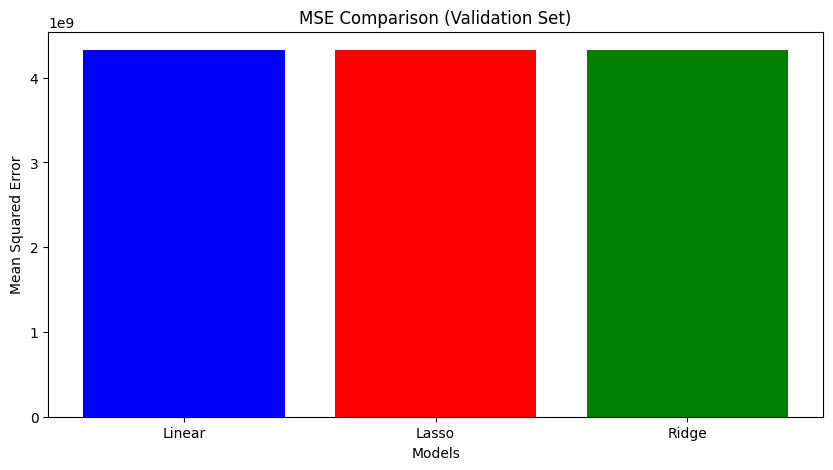

In [58]:

plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores_val, color=['blue', 'red', 'green'])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison (Validation Set)")
plt.show()

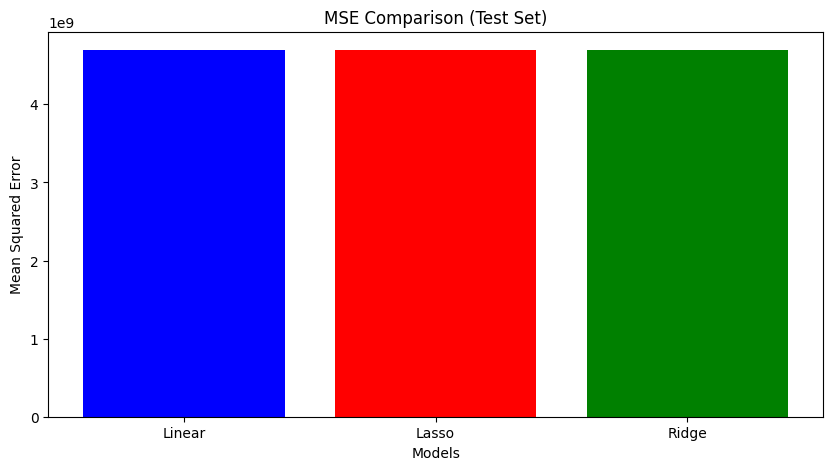

In [59]:
plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores_test, color=['blue', 'red', 'green'])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison (Test Set)")
plt.show()


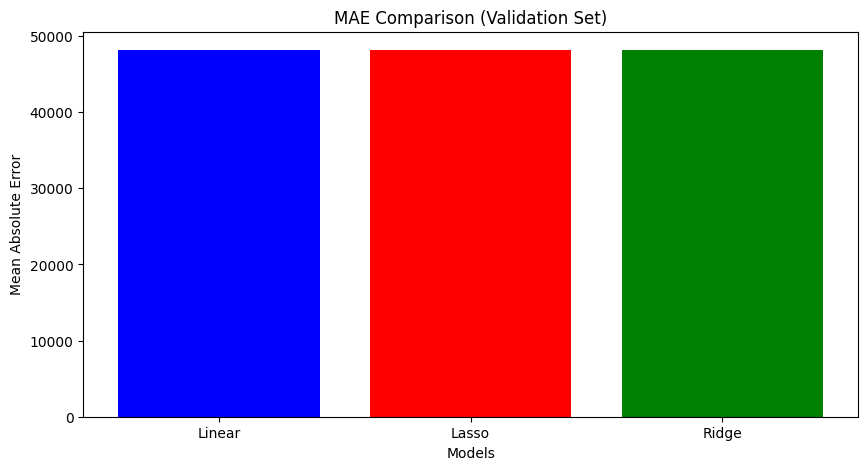

In [60]:
plt.figure(figsize=(10, 5))
plt.bar(models, mae_scores_val, color=['blue', 'red', 'green'])
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.title("MAE Comparison (Validation Set)")
plt.show()

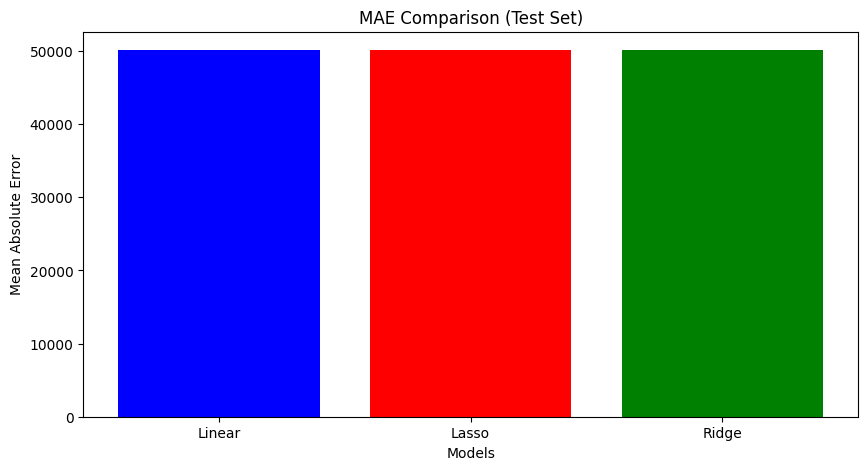

In [61]:

plt.figure(figsize=(10, 5))
plt.bar(models, mae_scores_test, color=['blue', 'red', 'green'])
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.title("MAE Comparison (Test Set)")
plt.show()

score is 0.6371479133745424
mean absolute error 49944.07898435164
mean squared error 4746378061.528063
score is 0.6371500025441823
mean absolute error 49944.228107879135
mean squared error 4746350733.618672
score is 0.6371520332364329
mean absolute error 49944.37757815959
mean squared error 4746324170.637492
score is 0.6371540062785913
mean absolute error 49944.52739180328
mean squared error 4746298361.7628565
score is 0.6371559224846238
mean absolute error 49944.67754545707
mean squared error 4746273296.347472
score is 0.6371577826554129
mean absolute error 49944.82803580377
mean squared error 4746248963.915197
score is 0.6371595875789989
mean absolute error 49944.978859561765
mean squared error 4746225354.157867
score is 0.6371613380308172
mean absolute error 49945.13001348456
mean squared error 4746202456.93221
score is 0.6371630347739294
mean absolute error 49945.2814943602
mean squared error 4746180262.256802
best alpha is 0.9
best score is 0.6371630347739294


<Axes: >

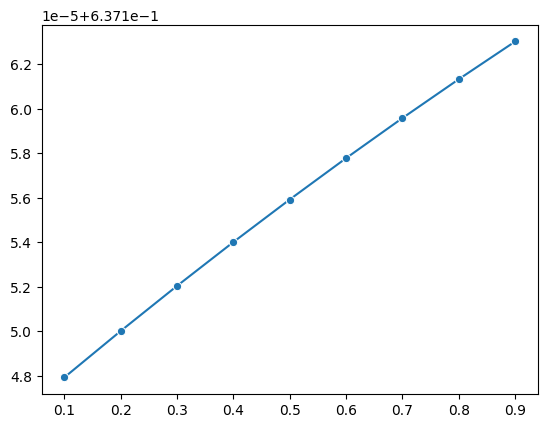

In [9]:
alpha=np.arange(0.1,1,0.1)
acc=[]
bestscore=0
bestalpha=0
for i in alpha:
    ri=Ridge(alpha=i)
    ri.fit(xtrain,ytrain)
    pree=ri.predict(xvid)
    acc.append(ri.score(xvid,yvid))
    if bestscore<ri.score(xvid,yvid):
        bestscore=ri.score(xvid,yvid)
        bestalpha=i
    print("score is",ri.score(xvid,yvid))
    print("mean absolute error",mean_absolute_error(yvid,pree))
    print("mean squared error",mean_squared_error(yvid,pree))
print("best alpha is",bestalpha)
print("best score is",bestscore)
sns.lineplot(x=alpha,y=acc,marker='o')

score is 0.6177861339847412
mean absolute error 49878.22967539269
mean squared error 4854663547.524327


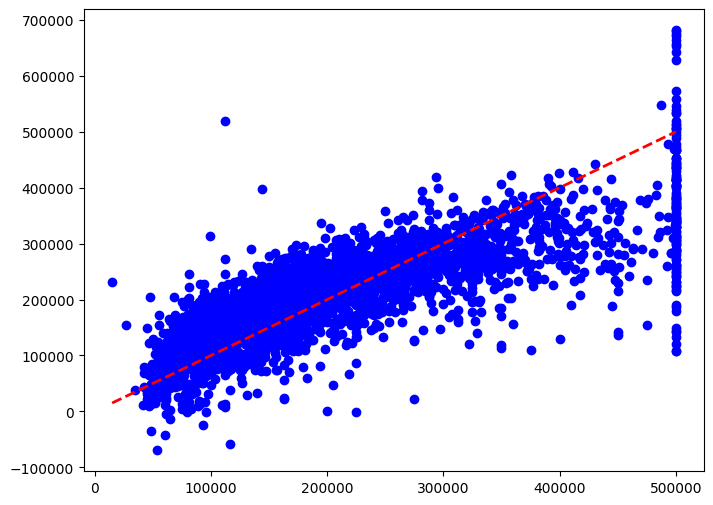

In [10]:
ri=Ridge(alpha=bestalpha)
ri.fit(xtrain,ytrain)
pree=ri.predict(xtest)
print("score is",ri.score(xtest,ytest))
print("mean absolute error",mean_absolute_error(ytest,pree))
print("mean squared error",mean_squared_error(ytest,pree))
plt.figure(figsize=(8, 6))
plt.scatter(ytest, pree, color='blue')
plt.plot([ytest.min(), ytest.max()], [ytest.min(),ytest.max()], 'r--', lw=2)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.989e+13, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371556865021135
mean absolute error 49943.59815266457
mean squared error 4746276383.176103


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.307e+13, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371592840478744
mean absolute error 49943.95087427336
mean squared error 4746229324.573153


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.211e+12, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371626669154827
mean absolute error 49944.30359588214
mean squared error 4746185074.121816


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.825e+12, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371658351049387
mean absolute error 49944.656317490924
mean squared error 4746143631.822094


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.248e+12, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371687886162422
mean absolute error 49945.02395964607
mean squared error 4746104997.673988


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.153e+12, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371715275170462
mean absolute error 49945.41976087186
mean squared error 4746069170.792544


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.363e+12, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371740516804103
mean absolute error 49945.825530362614
mean squared error 4746036152.838242


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.775e+12, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371763611647904
mean absolute error 49946.23600445715
mean squared error 4746005943.046431


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.326e+12, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371784559701865
mean absolute error 49946.678091212074
mean squared error 4745978541.41711


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.975e+12, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371803360965989
mean absolute error 49947.2046322104
mean squared error 4745953947.950282


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.696e+12, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371820015440273
mean absolute error 49947.742745493015
mean squared error 4745932162.645945


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.471e+12, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371834523124718
mean absolute error 49948.28085877562
mean squared error 4745913185.504098


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.287e+12, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371846884019323
mean absolute error 49948.81897205824
mean squared error 4745897016.524742


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+12, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.637185709812409
mean absolute error 49949.57214127046
mean squared error 4745883655.707878


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e+12, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371865165439018
mean absolute error 49950.45224137771
mean squared error 4745873103.053504


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.983e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371871085964107
mean absolute error 49951.33234148496
mean squared error 4745865358.561622


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371874860101496
mean absolute error 49952.21243494026
mean squared error 4745860421.706201


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.272e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371876487672723
mean absolute error 49953.092523571184
mean squared error 4745858292.720685


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.588e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371875967907412
mean absolute error 49953.97262090071
mean squared error 4745858972.612785


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.993e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371873301248894
mean absolute error 49954.85271990765
mean squared error 4745862460.802589


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.472e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371868487792285
mean absolute error 49955.73281891457
mean squared error 4745868757.165677


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.014e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371861527537585
mean absolute error 49956.6550721721
mean squared error 4745877861.702052


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.609e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371852420484796
mean absolute error 49957.59674474436
mean squared error 4745889774.41171


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.249e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371841166633913
mean absolute error 49958.55872330342
mean squared error 4745904495.294655


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.928e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371827765984941
mean absolute error 49959.546902362476
mean squared error 4745922024.350883


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.640e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371812218537878
mean absolute error 49960.63464301333
mean squared error 4745942361.580397


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.382e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371794524292724
mean absolute error 49961.72754812315
mean squared error 4745965506.983195


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.149e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371774683249479
mean absolute error 49962.820453232955
mean squared error 4745991460.559279


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.939e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371752695408144
mean absolute error 49963.939918814605
mean squared error 4746020222.308648


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.748e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.637172856087946
mean absolute error 49965.104220452195
mean squared error 4746051792.086442


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.574e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371702279487983
mean absolute error 49966.277054832826
mean squared error 4746086170.122159


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.415e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371673851221595
mean absolute error 49967.449889213465
mean squared error 4746123356.431645


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.270e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371643276078394
mean absolute error 49968.686331380806
mean squared error 4746163351.01739


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371610554107883
mean absolute error 49970.02321645277
mean squared error 4746206153.814642


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.015e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371575685331092
mean absolute error 49971.36010152472
mean squared error 4746251764.795892


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.903e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.637153866974802
mean absolute error 49972.712461049174
mean squared error 4746300183.96114


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371499507358667
mean absolute error 49974.12761356911
mean squared error 4746351411.310386


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.703e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371458198163035
mean absolute error 49975.5856325609
mean squared error 4746405446.843628


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.615e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371414742161121
mean absolute error 49977.07338242173
mean squared error 4746462290.560868


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.532e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371369139352928
mean absolute error 49978.593347154536
mean squared error 4746521942.462106


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.456e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371321389738454
mean absolute error 49980.142591273194
mean squared error 4746584402.547342


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371271493317701
mean absolute error 49981.715043452125
mean squared error 4746649670.816574


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.318e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371219450090666
mean absolute error 49983.29853315119
mean squared error 4746717747.269805


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.257e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371165259861384
mean absolute error 49984.92349308218
mean squared error 4746788632.163373


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.199e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371108922601765
mean absolute error 49986.54845427666
mean squared error 4746862325.53402


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6371050438468177
mean absolute error 49988.17341547114
mean squared error 4746938827.17721


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6370989807460616
mean absolute error 49989.79837666562
mean squared error 4747018137.092941


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.046e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6370927029579085
mean absolute error 49991.44255593886
mean squared error 4747100255.281215
score is 0.6370862104823583
mean absolute error 49993.1194770656
mean squared error 4747185181.74203
best alpha is 18
best score is 0.6371876487672723


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


<Axes: >

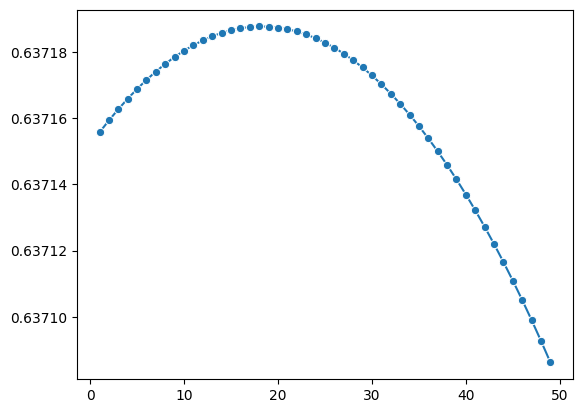

In [11]:
alpha=np.arange(1,50,1)
acc=[]
bestscore=0
bestalpha=0
for i in alpha:
    ri=Lasso(alpha=i)
    ri.fit(xtrain,ytrain)
    pree=ri.predict(xvid)
    acc.append(ri.score(xvid,yvid))
    if bestscore<ri.score(xvid,yvid):
        bestscore=ri.score(xvid,yvid)
        bestalpha=i
    print("score is",ri.score(xvid,yvid))
    print("mean absolute error",mean_absolute_error(yvid,pree))
    print("mean squared error",mean_squared_error(yvid,pree))
print("best alpha is",bestalpha)
print("best score is",bestscore)
sns.lineplot(x=alpha,y=acc,marker='o')

score is 0.6177584471361608
mean absolute error 49890.61507676335
mean squared error 4855015210.157476


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.272e+11, tolerance: 1.950e+10
  model = cd_fast.enet_coordinate_descent(


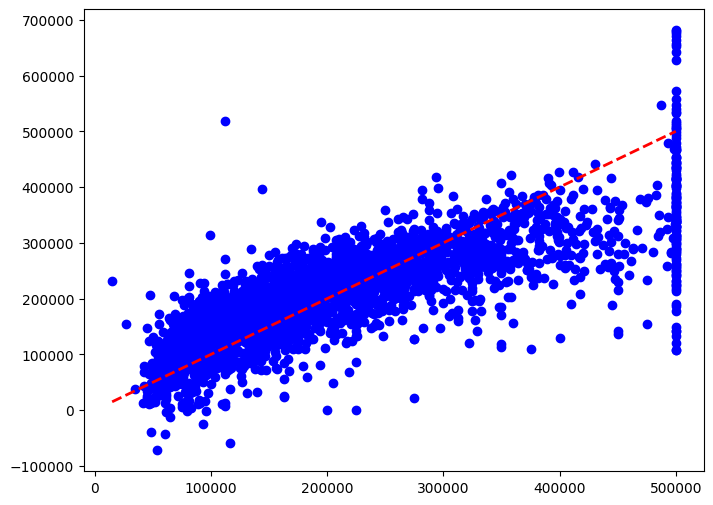

In [12]:
ri=Lasso(alpha=bestalpha)
ri.fit(xtrain,ytrain)
pree=ri.predict(xtest)
print("score is",ri.score(xtest,ytest))
print("mean absolute error",mean_absolute_error(ytest,pree))
print("mean squared error",mean_squared_error(ytest,pree))
plt.figure(figsize=(8, 6))
plt.scatter(ytest, pree, color='blue')
plt.plot([ytest.min(), ytest.max()], [ytest.min(),ytest.max()], 'r--', lw=2)
